<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Downloading-images-from-search-engine" data-toc-modified-id="Downloading-images-from-search-engine-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Downloading images from search engine</a></span><ul class="toc-item"><li><span><a href="#Get-images-url-with-duckduckgo" data-toc-modified-id="Get-images-url-with-duckduckgo-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get images url with duckduckgo</a></span></li><li><span><a href="#Download-images" data-toc-modified-id="Download-images-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Download images</a></span></li><li><span><a href="#Verify-images" data-toc-modified-id="Verify-images-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Verify images</a></span></li></ul></li><li><span><a href="#Experiment" data-toc-modified-id="Experiment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experiment</a></span></li></ul></div>

# Downloading images from search engine

## Get images url with duckduckgo

In [1]:
from utils import *

In [2]:
# from fastbook import *
from fastai.vision.widgets import *

In [3]:
??search_images_ddg

In [18]:
urls = search_images_ddg('bear',5)

In [19]:
urls[:5]

(#5) ['https://akns-images.eonline.com/eol_images/Entire_Site/201476/rs_600x600-140806101001-600.bieber-bear.jpg?fit=around%7C1080:1080&output-quality=90&crop=1080:1080;center,top','http://www.pbs.org/wnet/nature/files/2018/07/Bear133.jpg','https://www.aerotime.aero/upload/files/photo-1568162603664-fcd658421851.jpg','https://treesforlife.org.uk/wp-content/uploads/2019/07/Brown-bear-pixabay.jpg','https://breedinfo.ru/uploads/posts/2016-03/8_bear.jpg']

## Download images

In [11]:
path = Path('downloaded_images')

In [13]:
??search_images_ddg

In [24]:
# print('hello')
if not path.exists():
    path.mkdir()
    for o in ['bear']:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(o,max_n=5)
        print(results)
        download_images(dest, urls=results)

['https://akns-images.eonline.com/eol_images/Entire_Site/201476/rs_600x600-140806101001-600.bieber-bear.jpg?fit=around%7C1080:1080&output-quality=90&crop=1080:1080;center,top', 'http://www.pbs.org/wnet/nature/files/2018/07/Bear133.jpg', 'https://www.aerotime.aero/upload/files/photo-1568162603664-fcd658421851.jpg', 'https://treesforlife.org.uk/wp-content/uploads/2019/07/Brown-bear-pixabay.jpg', 'https://breedinfo.ru/uploads/posts/2016-03/8_bear.jpg']


## Verify images

In [25]:
fnames = get_image_files(path)

In [26]:
fnames

(#5) [Path('downloaded_images/bear/00000003.jpg'),Path('downloaded_images/bear/00000002.jpg'),Path('downloaded_images/bear/00000000.jpg'),Path('downloaded_images/bear/00000001.jpg'),Path('downloaded_images/bear/00000004.jpg')]

In [27]:
# this uses parallel function, and it's kinda like map
failed = verify_images(fnames)

In [29]:
??verify_images

then delete them using `Path.unlink`. For this one we dont have any failed image, so nothing is deleted

In [ ]:
failed.map(Path.unlink)

# Experiment

In [47]:
fnames = get_image_files(path)
fnames

(#3) [Path('downloaded_images/bear/00000000.jpg'),Path('downloaded_images/bear/00000001.jpg'),Path('downloaded_images/bear/00000004.jpg')]

<AxesSubplot:>

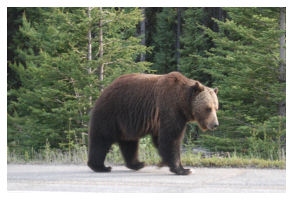

In [65]:
img = PILImage(PILImage.create(fnames[1]).resize((600,400)))
show_image(img)

<AxesSubplot:>

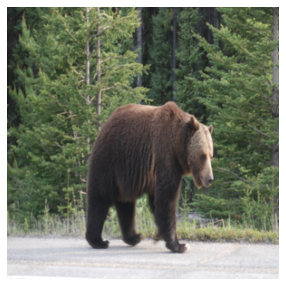

In [67]:
rsz = Resize(300, method=ResizeMethod.Squish)
show_image(rsz(img, split_idx=0))

(100, 100)


<AxesSubplot:>

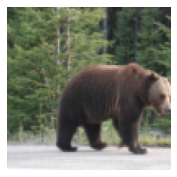

In [121]:
rsz = Resize(100, method=ResizeMethod.Crop)
tmp = rsz(img, split_idx=0)
print(tmp.shape)
show_image(tmp)